>>> Sampling 100 simulations...
Exploring class_compare/hosp_nc/Maryland ... ... 10 loaded
Exploring class_compare/hosp_wc/Maryland ... ... 10 loaded


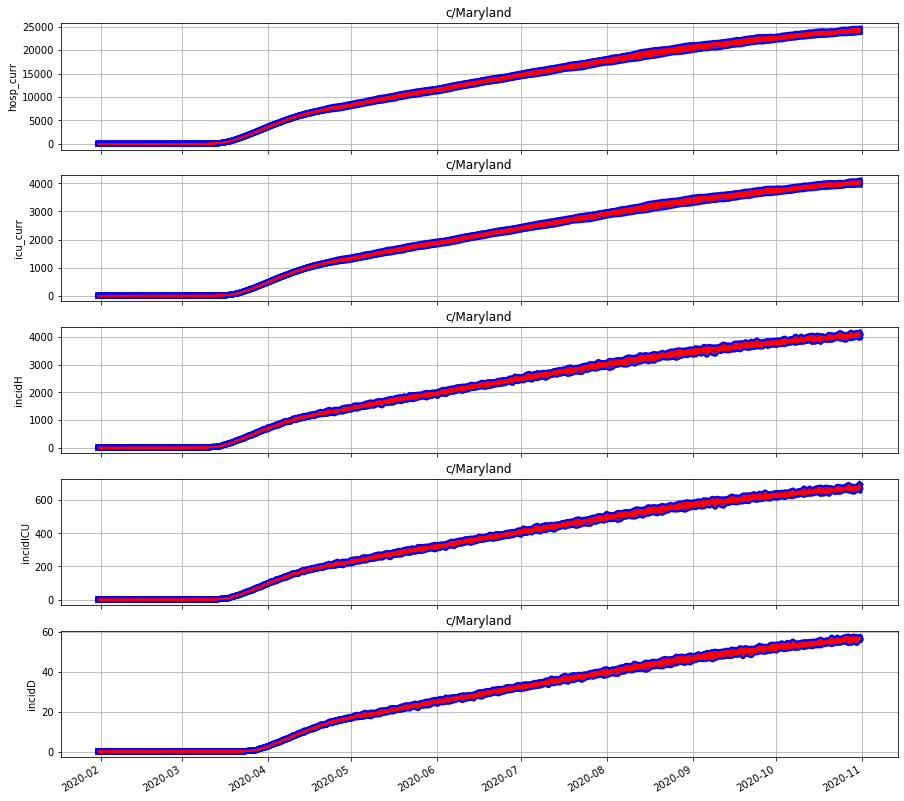

In [8]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from SEIR.utils import config

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

max_files = 100

print(f">>> Sampling {max_files} simulations...")


folder = [x for x in Path('class_compare/hosp_nc').glob('*') if not x.is_file()]

all_hosp_sim_nc = {}

for fold in folder:
    if ('importation' not in str(fold)):
        data = []
        print(f'Exploring {str(fold)[:]} ... ', end = '')
        files_loaded = 0
        for filename in Path(str(fold)).rglob('*.parquet'):
            if files_loaded < max_files:
                sim = pq.read_table(filename).to_pandas()
                sim = sim.groupby('time').sum()
                data.append(sim)
                files_loaded += 1

        if (len(data) > 0): 
            print(f'... {len(data)} loaded')
            all_hosp_sim_nc[str(fold)[20:]] = data
            
folder = [x for x in Path('class_compare/hosp_wc').glob('*') if not x.is_file()]
all_hosp_sim_wc = {}
for fold in folder:
    if ('importation' not in str(fold)):
        data = []
        print(f'Exploring {str(fold)[:]} ... ', end = '')
        files_loaded = 0
        for filename in Path(str(fold)).rglob('*.parquet'):
            if files_loaded < max_files:
                sim = pq.read_table(filename).to_pandas()
                sim = sim.groupby('time').sum()
                data.append(sim)
                files_loaded += 1

        if (len(data) > 0): 
            print(f'... {len(data)} loaded')
            all_hosp_sim_wc[str(fold)[20:]] = data

varplot = [ 'hosp_curr', 'icu_curr', 'incidH','incidICU', 'incidD']

fig, axes = plt.subplots(len(varplot),len(all_hosp_sim_wc), figsize =(15,15), sharex=True)
for vi, var in enumerate(varplot):
    for scn, key in enumerate(list(all_hosp_sim_wc.keys())):
        if len(all_hosp_sim_nc) > 1:
            ax = axes[vi][scn]
        else:
            ax = axes[vi]
        ax.set_title(key)
        #ax.xaxis.set_major_locator(plt.MaxNLocator(12))
        #ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax.grid()
        ax.set_ylabel(var)
        for sim in all_hosp_sim_wc[key]:
            ax.plot(sim[var], c = 'b', lw = 6)
        for sim in all_hosp_sim_nc[key]:
            ax.plot(sim[var], c = 'r')
    fig.autofmt_xdate()

plt.show()


In [2]:
sim = pq.read_table('class_compare/hosp_wc/Maryland/inference/med/2020.08.20.12:11:11.UTC000000001.2020.08.20.12:11:11.UTC.hosp.parquet').to_pandas()
#sim=sim[sim['geoid']=='36055']
#sim = sim.groupby('time').sum()
sim.head()

,time,geoid,incidI,incidH_a1,hosp_curr_a1,incidH_a2,hosp_curr_a2,incidH_a3,hosp_curr_a3,incidH,...,incidVent_a2,vent_curr_a2,incidVent_a3,vent_curr_a3,incidVent,vent_curr,incidC_a1,incidC_a2,incidC_a3,incidC
0,2020-01-31,51091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-01,51091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-02,51091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-03,51091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-04,51091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
sim.columns

Index(['time', 'geoid', 'incidI', 'incidH_a1', 'hosp_curr_a1', 'incidH_a2',
       'hosp_curr_a2', 'incidH_a3', 'hosp_curr_a3', 'incidH', 'hosp_curr',
       'incidD_a1', 'incidD_a2', 'incidD_a3', 'incidD', 'incidICU_a1',
       'icu_curr_a1', 'incidICU_a2', 'icu_curr_a2', 'incidICU_a3',
       'icu_curr_a3', 'incidICU', 'icu_curr', 'incidVent_a1', 'vent_curr_a1',
       'incidVent_a2', 'vent_curr_a2', 'incidVent_a3', 'vent_curr_a3',
       'incidVent', 'vent_curr', 'incidC_a1', 'incidC_a2', 'incidC_a3',
       'incidC'],
      dtype='object')

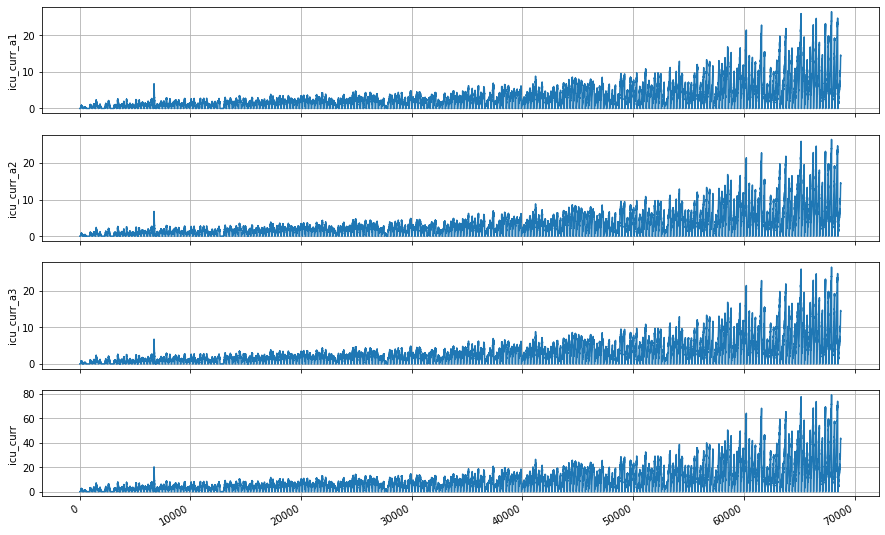

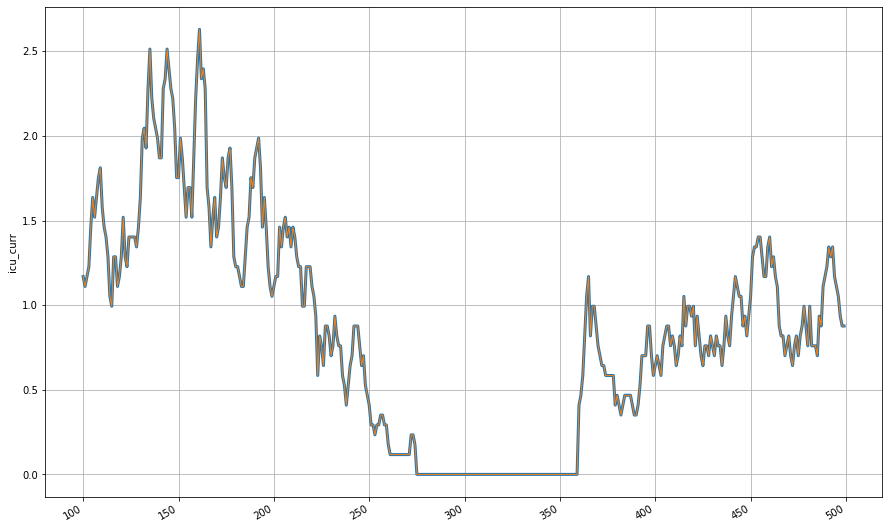

In [6]:
varname = 'icu_curr'
varplot = [c for c in list(sim.columns) if varname in c]

fig, axes = plt.subplots(len(varplot),1, figsize =(15,10), sharex=True)
for vi, var in enumerate(varplot):
    #ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    #ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax = axes[vi]
    ax.grid()
    ax.set_ylabel(var)
    ax.plot(sim[var])
    fig.autofmt_xdate()
plt.show()

varplot = [c for c in list(sim.columns) if ((varname in c) and ('_a' in c))]
fig, ax = plt.subplots(1,1, figsize =(15,10), sharex=True)
ax.grid()
ax.set_ylabel(var)
ax.plot(sim[varplot].sum(axis=1)[100:500], lw = 3)
ax.plot(sim[varname][100:500], lw = 1)
fig.autofmt_xdate()
plt.show()